In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt

import the xlsx file to do processing

In [3]:
start_time = time.time()
xls = pd.ExcelFile('CRA.xlsx')
df1 = pd.read_excel(xls, 'Sheet1')
print("--- %s seconds ---" % (time.time() - start_time))

--- 78.11947464942932 seconds ---


Get all the columns data and remove the index column

In [4]:
df=df1.drop(df1.columns[0], axis=1)
df.columns

Index(['EventTime', 'ObjectName', 'ObjectDescription', 'UserAccount',
       'Message', 'NodeName', 'FromValue', 'ToValue', 'Path', 'Block',
       'Change Type', 'Equipment Group', 'Sequence', 'Object Interacted With',
       'UserID', 'Action Variable', 'Object Type', 'Action Class'],
      dtype='object')

First get the no. of filters and next get each filter. For the sake of simplicity i have introduced three filters 

In [5]:
filters = 3
filter_columns = ['Action Class','Change Type', 'Block']

Get the filter values of each column

In [6]:
for i in filter_columns:
    print('------------', i)
    print(list(set(df[i])))

------------ Action Class
[nan, 'MI']
------------ Change Type
['Web System Workplace', '[Object Type Structure', 'Graphic Action', 'Control Action']
------------ Block
[nan, 'SPB', 'EQUIPMENT', 'Control System', 'EB', 'PEL_System', 'WPB', 'Utility', 'RB', 'test-wpb']


In [7]:
FV = ['MI','Control Action','RB']

Filtering operation

In [8]:
data=df
print(len(data))
for i in range(len(FV)):
    
    is_filt = data[filter_columns[i]] == FV[i]
    data = data[is_filt]
    print(len(data))

356233
135302
89473
12903


In [9]:
data

,EventTime,ObjectName,ObjectDescription,UserAccount,Message,NodeName,FromValue,ToValue,Path,Block,Change Type,Equipment Group,Sequence,Object Interacted With,UserID,Action Variable,Object Type,Action Class
659,07-31-2020 23:28:59,XV1_84285,ValveUniM,APLKDOMAIN\P00115371,InteractionPar.ManCmd1 False -> True,APLK-RSHS2,False,True,[Control Structure]Root/Control Network RB/RB_...,RB,Control Action,ReaTraDir,XV1_84285,XV1_84285,P00115371,InteractionPar.ManCmd1,Valve,MI
660,07-31-2020 23:29:11,XV1_84285,ValveUniM,APLKDOMAIN\P00115371,InteractionPar.ManCmd0 False -> True,APLK-RSHS2,False,True,[Control Structure]Root/Control Network RB/RB_...,RB,Control Action,ReaTraDir,XV1_84285,XV1_84285,P00115371,InteractionPar.ManCmd0,Valve,MI
700,07-31-2020 23:32:54,XV1_84436,ValveUniM,APLKDOMAIN\P00115371,InteractionPar.ManCmd0 False -> True,APLK-RSHS2,False,True,[Control Structure]Root/Control Network RB/RB_...,RB,Control Action,ReaTraDir,XV1_84436,XV1_84436,P00115371,InteractionPar.ManCmd0,Valve,MI
961,08-01-2020 01:00:45,TIT_11533,Chilling cold well TIT,APLKDOMAIN\800xaappeng,InteractionPar.LevelLL 0 -> 10,APLK-RSHS3,0,10,[Control Structure]Root/Control Network RB/RB_...,RB,Control Action,COOLING_TOWER,TIT_11533,TIT_11533,800xaappeng,InteractionPar.LevelLL,Temperature Transmitter,MI
964,08-01-2020 01:00:58,TIT_11533,Chilling cold well TIT,APLKDOMAIN\800xaappeng,InteractionPar.LevelH 70 -> 22,APLK-RSHS3,70,22,[Control Structure]Root/Control Network RB/RB_...,RB,Control Action,COOLING_TOWER,TIT_11533,TIT_11533,800xaappeng,InteractionPar.LevelH,Temperature Transmitter,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355823,08-31-2020 21:19:26,XV1_07327,ST-M4303 A pump Discharge XV,APLKDOMAIN\P00117909,InteractionPar.ManCmd1 False -> True,APLK-RSHS3,False,True,[Control Structure]Root/Control Network RB/RB_...,RB,Control Action,DEXTRIN,XV1_07327,XV1_07327,P00117909,InteractionPar.ManCmd1,Valve,MI
355920,08-31-2020 21:30:37,XV1_07326,ST-M4303 A pump suction XV,APLKDOMAIN\P00117909,InteractionPar.ManCmd1 False -> True,APLK-RSHS3,False,True,[Control Structure]Root/Control Network RB/RB_...,RB,Control Action,DEXTRIN,XV1_07326,XV1_07326,P00117909,InteractionPar.ManCmd1,Valve,MI
355997,08-31-2020 21:38:18,P_M4401B,ST-M4303 B pump,APLKDOMAIN\P00117909,Loc_Sel True -> False,APLK-RSHS3,True,False,[Control Structure]Root/Control Network RB/RB_...,RB,Control Action,DEXTRIN,P_M4401B,P_M4401B,P00117909,Loc_Sel,Pump,MI
356001,08-31-2020 21:38:27,XV1_07326,ST-M4303 A pump suction XV,APLKDOMAIN\P00117909,InteractionPar.ManCmd0 False -> True,APLK-RSHS3,False,True,[Control Structure]Root/Control Network RB/RB_...,RB,Control Action,DEXTRIN,XV1_07326,XV1_07326,P00117909,InteractionPar.ManCmd0,Valve,MI


Get the column name for which the count has to be found

In [10]:
Column_name_pivot = 'Equipment Group'

In [11]:
l_O_C = list(data[Column_name_pivot])

Counting of the unique elements in the list

In [12]:
Result = dict()
for i in l_O_C:
    Result[i] = Result.get(i, 0) + 1

Sorting dictionary

In [13]:
sorted_keys = sorted(Result, key=Result.get, reverse=True)
sorted_Result=dict()
for w in sorted_keys:
    sorted_Result[w] = Result[w]
for i,j in sorted_Result.items():
    print(i, j)

ReaTraDir 3682
ASTTraDir 1375
ST-M4301 1056
BLTraDir 954
XCTTraDir 790
FltrTraDir 789
SepTraDir 664
PGL_29 609
VesTraDir 564
BTTraDir 401
COOLING_TOWER 398
Tank_Farms 293
RB_Pigging 278
SOLVENT_TF 209
ST_M4008_M4009 170
DEXTRIN 162
SCRTraDir 153
DPVTraDir 80
POTABLE_WATER 78
PSTTraDir 62
Program1 41
RefluxVesTraDir 32
Control Network RB 29
Utility 23
TFS_SYSTEM 10
Application_1 1


<BarContainer object of 26 artists>

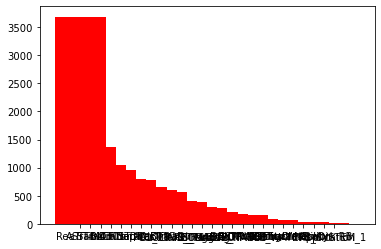

In [18]:
plt.bar(sorted_Result.keys(), sorted_Result.values(), 5, color='r')